# Exploring Dandiset 001276: Remote Targeting Electroporation Study on Cell Monolayers

**DISCLAIMER**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains data from experiments conducted by Silkuniene et al. investigating a technique called CANCAN (Cancellation-Assisted Non-uniform Cell Affected Network) for remote targeting electroporation. The study focuses on the effect of varying burst numbers on permeabilization distribution in confluent cell monolayers.

The experiments used a four-electrode array with 10.0 mm inter-electrode distance. The CANCAN protocols utilized canceling pulses to minimize cell damage near the electrodes while targeting cells in the center of the electrode array. Each pulse in the protocol had a duration of 600 ns, and the protocol consisted of nine packets of pulses delivered at 0.2 MHz, repeated 1, 2, 4, or 6 times at a frequency of 1 Hz.

Cell monolayer integrity was assessed using Hoechst staining, while membrane permeability was evaluated using YoPro-1.

View this Dandiset online at: [https://neurosift.app/dandiset/001276](https://neurosift.app/dandiset/001276)

## What this notebook covers

In this notebook, we will:

1. Connect to the DANDI archive and retrieve information about Dandiset 001276
2. Explore the assets available in this Dandiset
3. Load and examine metadata from a selected NWB file
4. Visualize fluorescence imaging data from the file
5. Compare data across multiple conditions

This notebook demonstrates how to work with NWB files containing imaging data from electroporation experiments, particularly focusing on visualization and basic analysis of the fluorescence data that shows cell permeabilization patterns.

## Required Packages

The following packages are required to run this notebook:

- `dandi`: For accessing the DANDI archive and Dandiset
- `h5py`: For working with HDF5 files, which NWB files are based on
- `pynwb`: For working with NWB files
- `remfile`: For remote file access
- `matplotlib`: For visualization
- `numpy`: For numerical operations
- `seaborn`: For enhanced visualization
- `skimage`: For image processing functions

In [1]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
from dandi.dandiapi import DandiAPIClient
import matplotlib.gridspec as gridspec
from skimage import exposure
import seaborn as sns

# Set up plotting parameters
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

## Connecting to the DANDI Archive and Exploring the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001276")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 108 assets in the dataset

First 5 assets:
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb
- sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb


Let's look at the sizes of the NWB files to understand the dataset better:

In [3]:
# Get file sizes and organize by subject/group
file_sizes = {}
for asset in assets:
    # Extract the subject/condition part from the path
    parts = asset.path.split('/')
    if len(parts) > 0:
        subject = parts[0]
        if subject not in file_sizes:
            file_sizes[subject] = []
        file_sizes[subject].append({
            'path': asset.path,
            'size_mb': asset.size / (1024 * 1024)  # Convert to MB
        })

# Show number of files per subject
print("Number of files per subject/condition:")
for subject, files in file_sizes.items():
    total_size_gb = sum(file['size_mb'] for file in files) / 1024
    print(f"{subject}: {len(files)} files, total size: {total_size_gb:.2f} GB")

Number of files per subject/condition:
sub-P1-20240627-A2: 2 files, total size: 0.79 GB
sub-P1-20240627-A3: 2 files, total size: 0.83 GB
sub-P1-20240627-B1: 2 files, total size: 0.79 GB
sub-P1-20240627-B2: 2 files, total size: 0.84 GB
sub-P1-20240627-B3: 2 files, total size: 0.82 GB
sub-P1-20240702-A1: 1 files, total size: 0.33 GB
sub-P1-20240702-A2: 2 files, total size: 0.78 GB
sub-P1-20240702-A3: 2 files, total size: 0.78 GB
sub-P1-20240702-B1: 2 files, total size: 0.78 GB
sub-P1-20240702-B3: 2 files, total size: 0.79 GB
sub-P1-20240703-A1: 2 files, total size: 0.81 GB
sub-P1-20240703-A2: 2 files, total size: 0.78 GB
sub-P1-20240703-A3: 2 files, total size: 0.79 GB
sub-P1-20240703-B1: 2 files, total size: 0.78 GB
sub-P1-20240703-B2: 2 files, total size: 0.80 GB
sub-P1-20240703-B3: 2 files, total size: 0.82 GB
sub-P1-20240813-A1: 2 files, total size: 0.80 GB
sub-P1-20240813-A2: 2 files, total size: 0.77 GB
sub-P1-20240813-A3: 2 files, total size: 0.72 GB
sub-P1-20240813-B1: 2 files, t

## Loading and Exploring an NWB File

Let's load one of the NWB files and examine its contents. We'll use the file "sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb", which is approximately 450 MB in size.

In [4]:
# File URL to load
url = "https://api.dandiarchive.org/api/assets/95141d7a-82aa-4552-940a-1438a430a0d7/download/"

# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Now let's examine the metadata from this NWB file:

In [5]:
# Print basic metadata
print(f"Session Description: {nwb.session_description}")
print(f"File Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter(s): {nwb.experimenter}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

# Subject information
print("\nSubject Information:")
print(f"  Subject ID: {nwb.subject.subject_id}")
print(f"  Age: {nwb.subject.age} ({nwb.subject.age__reference})")
print(f"  Sex: {nwb.subject.sex}")
print(f"  Species: {nwb.subject.species}")
print(f"  Strain: {nwb.subject.strain}")

Session Description: Acquisition Description (Subject-Specific): Subject ID: P1_20240627_A2, Fluorescent Channel: DAPI, Phase: pre (where 'pre' indicates imaging prior to exposure and 'post' indicates imaging of the same well after exposure).  CanCan protocol (with canceling pulses),011: Protocol consisted of 9 packets of pulses delivered at 0.2MHz frequency, protocol repeated 2 times at 1Hz frequency. General Protocol Description (Subject-Independent): Experiments were conducted using a four-electrode stainless steel setup with an inter-electrode distance of 10.0 mm. The CanCan exposure protocol involved delivering packets of 600 ns pulses from four electrodes. Initially, a single 600 ns pulse (7.2 kV) was applied from one electrode (e.g., electrode 1), constituting phase 1. Subsequently, simultaneous 600 ns pulses with an amplitude reduced by 12.5% were delivered from two electrodes (e.g., electrodes 2 and 4), followed by another set of simultaneous pulses with an additional 12.5% am

Let's look at the acquisition data that's available in this file:

In [6]:
# Print acquisition data information
print("Acquisition Data:")
for key in nwb.acquisition.keys():
    print(f"  {key}")
    data_item = nwb.acquisition[key]
    # Print details of the data item if it's an ImageSeries
    if isinstance(data_item, pynwb.image.ImageSeries):
        print(f"    Data Type: ImageSeries")
        print(f"    Shape: {data_item.data.shape}")
        print(f"    Dimension: {nwb.acquisition[key].dimension[:]}")
        print(f"    Unit: {data_item.unit}")
        print(f"    Resolution: {data_item.resolution}")
        print(f"    Description: {data_item.description[:100]}...")

Acquisition Data:
  SingleTimePointImaging
    Data Type: ImageSeries
    Shape: (1, 19190, 19190)
    Dimension: [19190 19190]
    Unit: n.a.
    Resolution: 0.1
    Description: Acquisition Description (Subject-Specific): Subject ID: P1_20240627_A2, Fluorescent Channel: DAPI, P...


## Visualizing Image Data

Now let's visualize a section of the image data. Since the full image is very large (19190 x 19190), we'll extract a smaller region to visualize first.

In [7]:
# Get image data from the NWB file
image_data = nwb.acquisition["SingleTimePointImaging"]

# Get dimensions to understand the image
dims = image_data.dimension[:]
print(f"Image dimensions: {dims}")

# Extract a smaller section of the image for visualization
# The image dimensions are (1, 19190, 19190) - we'll extract a central section
start_row = dims[0] // 2 - 1000
end_row = dims[0] // 2 + 1000
start_col = dims[1] // 2 - 1000
end_col = dims[1] // 2 + 1000

print(f"Extracting central region: rows {start_row}-{end_row}, columns {start_col}-{end_col}")

# Extract the image section
img_section = image_data.data[0, start_row:end_row, start_col:end_col]

Image dimensions: [19190 19190]
Extracting central region: rows 8595-10595, columns 8595-10595


Let's visualize the central region of the image, which should show the targeted cells in the center of the electrode array according to the study description.

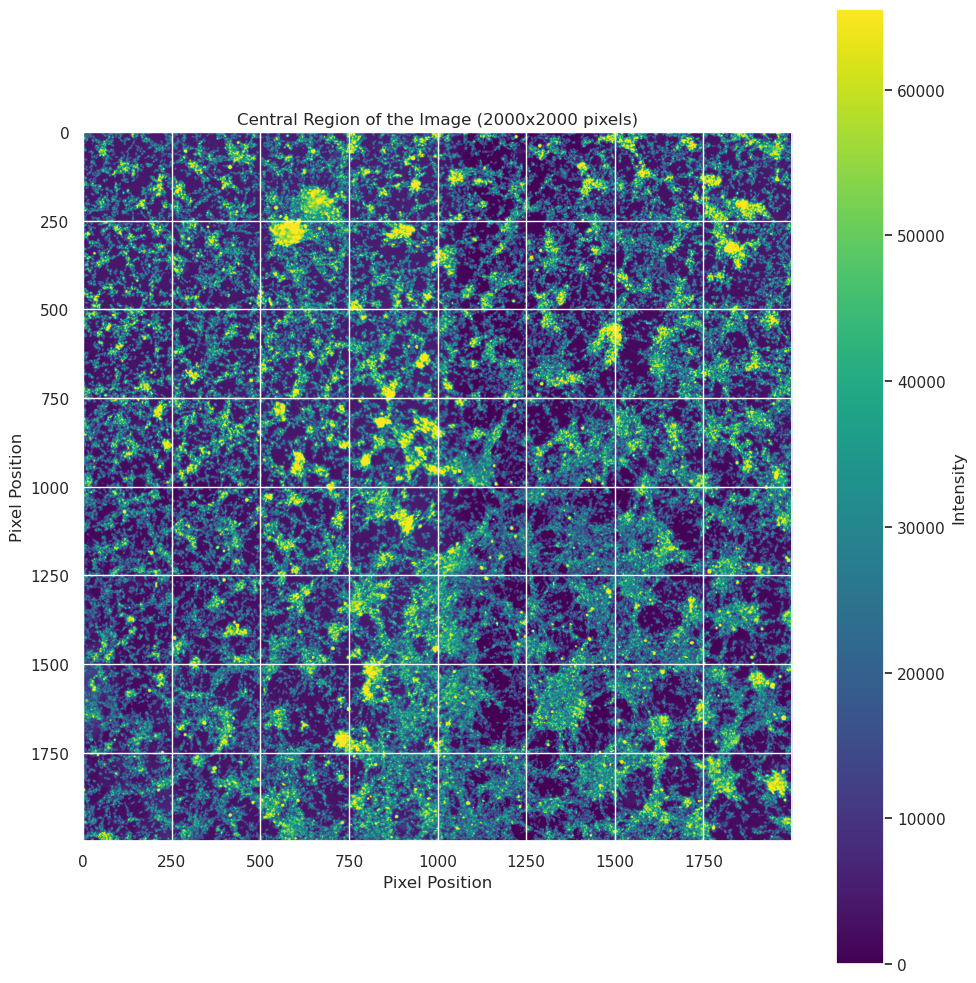

In [8]:
# Visualize the image section
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Apply contrast stretching for better visualization
p2, p98 = np.percentile(img_section, (2, 98))
img_rescale = exposure.rescale_intensity(img_section, in_range=(p2, p98))

# Display the image
im = ax.imshow(img_rescale, cmap='viridis')
plt.colorbar(im, ax=ax, label='Intensity')
ax.set_title('Central Region of the Image (2000x2000 pixels)')
ax.set_xlabel('Pixel Position')
ax.set_ylabel('Pixel Position')

plt.tight_layout()
plt.show()

Let's also look at the intensity profile across horizontal and vertical cross-sections through the center of the image.

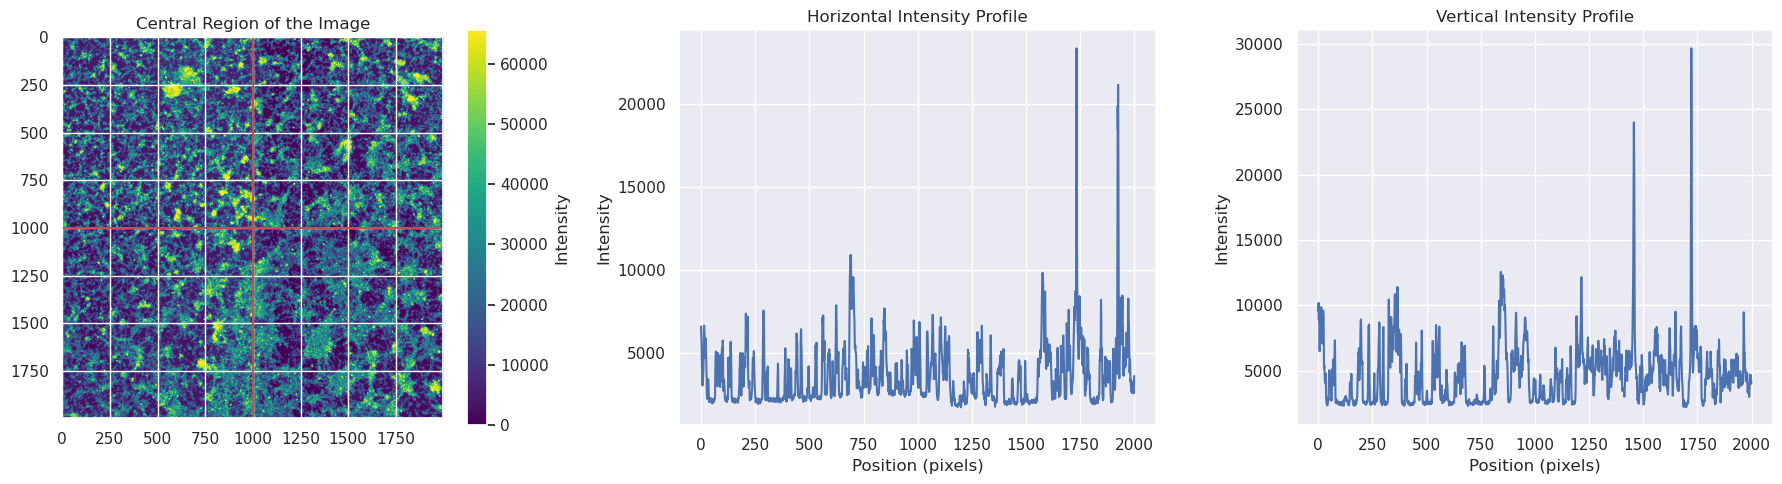

In [9]:
# Plot intensity profiles
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Display the image again
im = ax1.imshow(img_rescale, cmap='viridis')
plt.colorbar(im, ax=ax1, label='Intensity')
ax1.set_title('Central Region of the Image')
ax1.axhline(y=img_section.shape[0]//2, color='r', linestyle='-')
ax1.axvline(x=img_section.shape[1]//2, color='r', linestyle='-')

# Horizontal intensity profile
horizontal_profile = img_section[img_section.shape[0]//2, :]
ax2.plot(horizontal_profile)
ax2.set_title('Horizontal Intensity Profile')
ax2.set_xlabel('Position (pixels)')
ax2.set_ylabel('Intensity')

# Vertical intensity profile
vertical_profile = img_section[:, img_section.shape[1]//2]
ax3.plot(vertical_profile)
ax3.set_title('Vertical Intensity Profile')
ax3.set_xlabel('Position (pixels)')
ax3.set_ylabel('Intensity')

plt.tight_layout()
plt.show()

## Comparing Multiple Regions of the Image

Let's examine multiple regions of the image to better understand the spatial distribution of fluorescence.

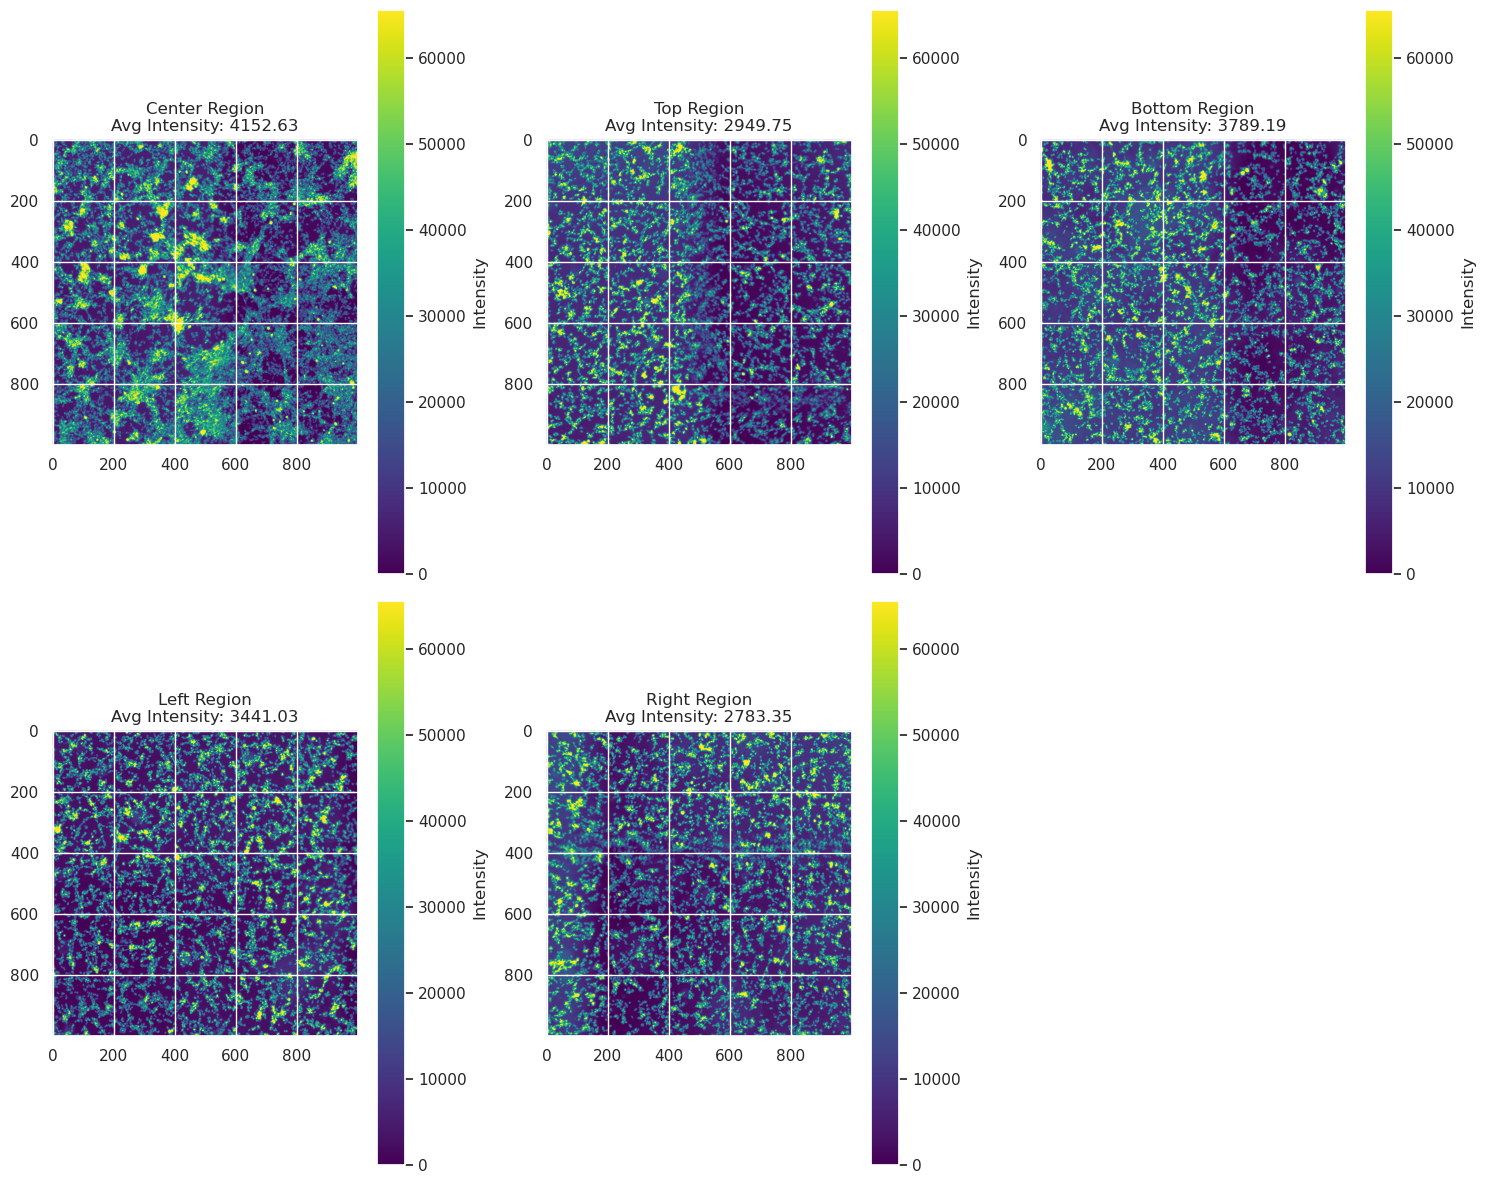

In [10]:
# Define regions to extract from the full image
regions = [
    {'name': 'Center', 'row_slice': (dims[0]//2-500, dims[0]//2+500), 'col_slice': (dims[1]//2-500, dims[1]//2+500)},
    {'name': 'Top', 'row_slice': (1000, 2000), 'col_slice': (dims[1]//2-500, dims[1]//2+500)},
    {'name': 'Bottom', 'row_slice': (dims[0]-2000, dims[0]-1000), 'col_slice': (dims[1]//2-500, dims[1]//2+500)},
    {'name': 'Left', 'row_slice': (dims[0]//2-500, dims[0]//2+500), 'col_slice': (1000, 2000)},
    {'name': 'Right', 'row_slice': (dims[0]//2-500, dims[0]//2+500), 'col_slice': (dims[1]-2000, dims[1]-1000)}
]

# Extract and visualize each region
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(2, 3)

# Define a function to get the average intensity in a region
def get_avg_intensity(img, row_slice, col_slice):
    return np.mean(img[0, row_slice[0]:row_slice[1], col_slice[0]:col_slice[1]])

# Create a list to store region statistics
region_stats = []

for i, region in enumerate(regions):
    # Extract region
    row_slice = region['row_slice']
    col_slice = region['col_slice']
    img_region = image_data.data[0, row_slice[0]:row_slice[1], col_slice[0]:col_slice[1]]
    
    # Calculate statistics
    avg_intensity = np.mean(img_region)
    region_stats.append({
        'name': region['name'],
        'avg_intensity': avg_intensity,
        'max_intensity': np.max(img_region),
        'min_intensity': np.min(img_region),
        'std_deviation': np.std(img_region)
    })
    
    # Apply contrast stretching for better visualization
    p2, p98 = np.percentile(img_region, (2, 98))
    img_rescale = exposure.rescale_intensity(img_region, in_range=(p2, p98))
    
    # Plot the region
    ax = fig.add_subplot(gs[i//3, i%3])
    im = ax.imshow(img_rescale, cmap='viridis')
    plt.colorbar(im, ax=ax, label='Intensity')
    ax.set_title(f'{region["name"]} Region\nAvg Intensity: {avg_intensity:.2f}')

plt.tight_layout()
plt.show()

Let's create a bar plot to compare the average intensities across the different regions:

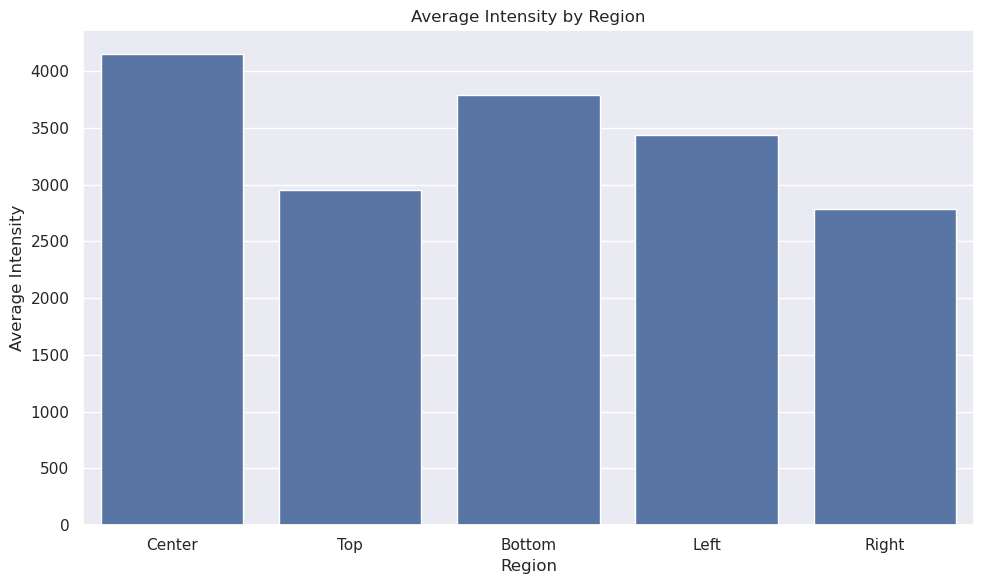

In [11]:
# Create a bar plot for average intensities
plt.figure(figsize=(10, 6))
names = [stat['name'] for stat in region_stats]
avg_intensities = [stat['avg_intensity'] for stat in region_stats]

sns.barplot(x=names, y=avg_intensities)
plt.title('Average Intensity by Region')
plt.ylabel('Average Intensity')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Loading and Comparing Data from Multiple Files

Now, let's load data from another NWB file to compare different experimental conditions. We'll use a file from a different experimental group.

In [12]:
# Let's choose a file from a different condition (B series instead of A series)
# We'll use the file: "sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb"
url_file2 = "https://api.dandiarchive.org/api/assets/e671bd0e-531d-4219-b38b-480d6179a7fc/download/"

# Load the NWB file
remote_file2 = remfile.File(url_file2)
h5_file2 = h5py.File(remote_file2)
io2 = pynwb.NWBHDF5IO(file=h5_file2)
nwb2 = io2.read()

# Print basic metadata for comparison
print(f"File 2 - Subject ID: {nwb2.subject.subject_id}")
print(f"File 2 - Session Description: {nwb2.session_description[:100]}...")

File 2 - Subject ID: P1_20240627_B1
File 2 - Session Description: Acquisition Description (Subject-Specific): Subject ID: P1_20240627_B1, Fluorescent Channel: DAPI, P...


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Now let's compare the central regions of both images to see if there are differences in the electroporation patterns between conditions A and B:

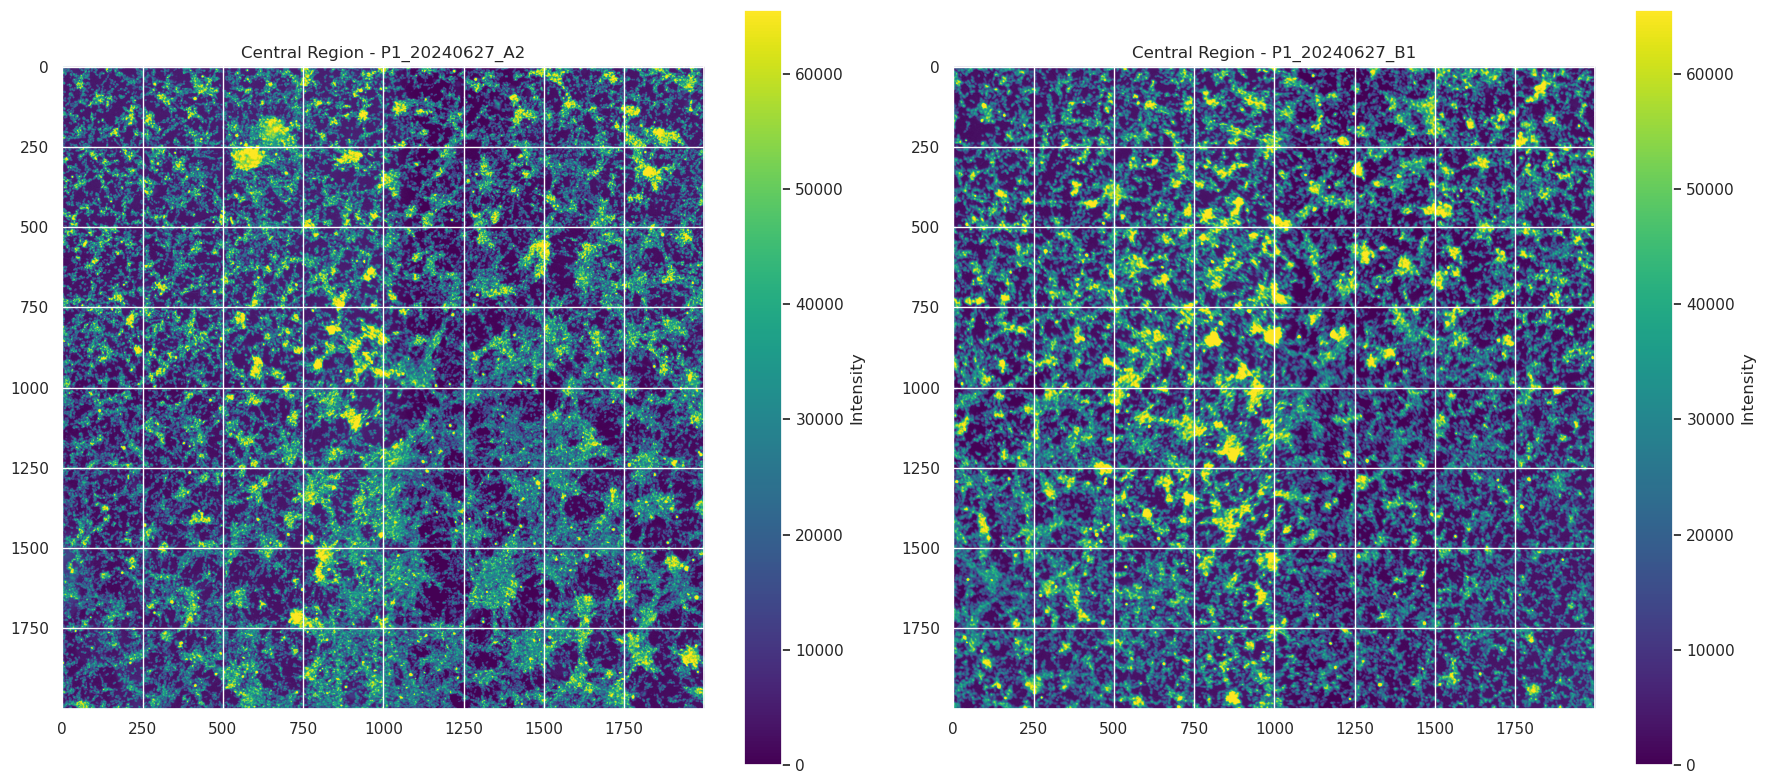

In [13]:
# Get dimensions for the second image 
image_data2 = nwb2.acquisition["SingleTimePointImaging"]
dims2 = image_data2.dimension[:]

# Extract the same central region from both images
start_row = dims[0] // 2 - 1000
end_row = dims[0] // 2 + 1000
start_col = dims[1] // 2 - 1000
end_col = dims[1] // 2 + 1000

# Extract the image sections
img_section_A = image_data.data[0, start_row:end_row, start_col:end_col]
img_section_B = image_data2.data[0, start_row:end_row, start_col:end_col]

# Create a figure to compare both images
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Process and display the first image (A series)
p2_A, p98_A = np.percentile(img_section_A, (2, 98))
img_rescale_A = exposure.rescale_intensity(img_section_A, in_range=(p2_A, p98_A))
im1 = axes[0].imshow(img_rescale_A, cmap='viridis')
plt.colorbar(im1, ax=axes[0], label='Intensity')
axes[0].set_title(f'Central Region - {nwb.subject.subject_id}')

# Process and display the second image (B series)
p2_B, p98_B = np.percentile(img_section_B, (2, 98))
img_rescale_B = exposure.rescale_intensity(img_section_B, in_range=(p2_B, p98_B))
im2 = axes[1].imshow(img_rescale_B, cmap='viridis')
plt.colorbar(im2, ax=axes[1], label='Intensity')
axes[1].set_title(f'Central Region - {nwb2.subject.subject_id}')

plt.tight_layout()
plt.show()

Let's also compare the intensity histograms of the two images:

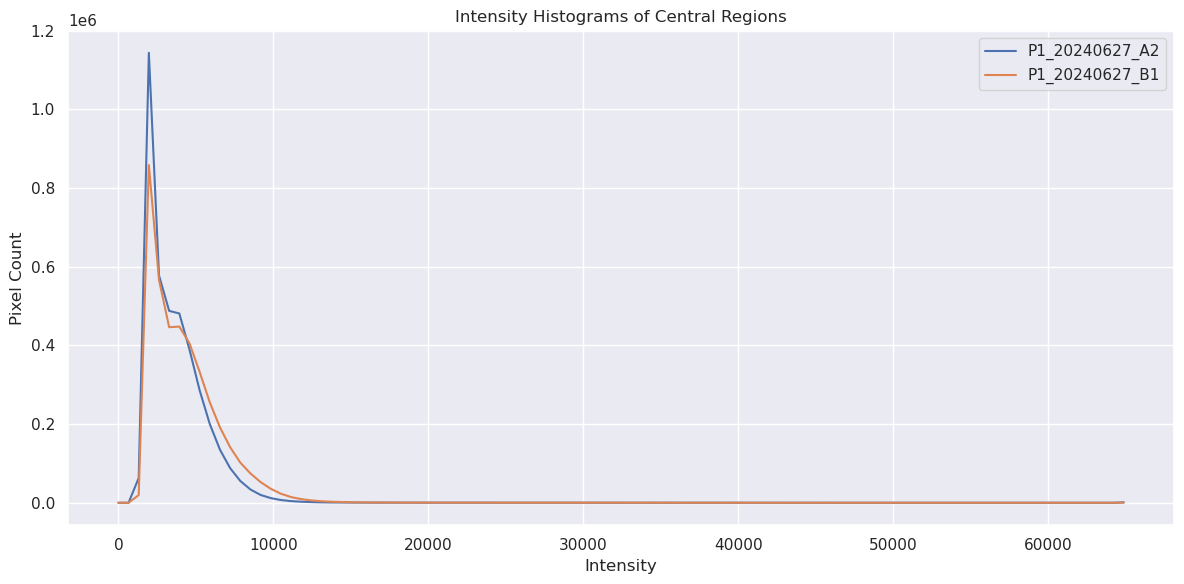

In [14]:
# Create histograms of intensity values
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate histograms
hist_A, bins_A = np.histogram(img_section_A.flatten(), bins=100, range=(0, np.max([np.max(img_section_A), np.max(img_section_B)])))
hist_B, bins_B = np.histogram(img_section_B.flatten(), bins=100, range=(0, np.max([np.max(img_section_A), np.max(img_section_B)])))

# Plot histograms
ax.plot(bins_A[:-1], hist_A, label=f'{nwb.subject.subject_id}')
ax.plot(bins_B[:-1], hist_B, label=f'{nwb2.subject.subject_id}')

ax.set_title('Intensity Histograms of Central Regions')
ax.set_xlabel('Intensity')
ax.set_ylabel('Pixel Count')
ax.legend()

plt.tight_layout()
plt.show()

## Analyzing the Spatial Distribution of Intensities

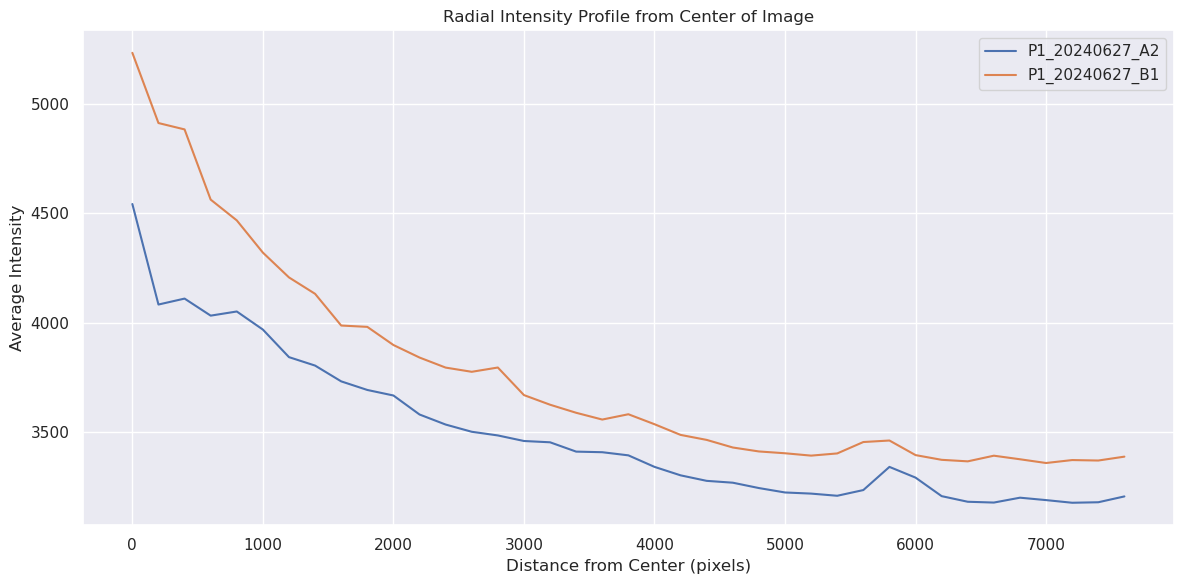

In [15]:
# Let's create a radial profile analysis to better understand how the intensity changes 
# with distance from the center of the image

# Define center point in both full images
center_y, center_x = dims[0] // 2, dims[1] // 2

# Create a function to calculate the average intensity at different radii
def radial_profile(data, center_y, center_x, max_radius=5000, step=100):
    y, x = np.indices(data.shape)
    r = np.sqrt((x - center_x)**2 + (y - center_y)**2)
    
    # Create radial bins
    radii = np.arange(0, max_radius, step)
    intensities = []
    
    for i in range(len(radii)-1):
        inner_radius = radii[i]
        outer_radius = radii[i+1]
        mask = (r >= inner_radius) & (r < outer_radius)
        if np.any(mask):  # Check if any pixels in this ring
            mean_intensity = np.mean(data[mask])
            intensities.append(mean_intensity)
        else:
            intensities.append(0)  # If no pixels, set to zero
    
    return radii[:-1], intensities

# Calculate radial profiles - but using a smaller step size and max radius to be more efficient
radii_A, intensities_A = radial_profile(image_data.data[0], center_y, center_x, max_radius=8000, step=200)
radii_B, intensities_B = radial_profile(image_data2.data[0], center_y, center_x, max_radius=8000, step=200)

# Plot the radial profiles
plt.figure(figsize=(12, 6))
plt.plot(radii_A, intensities_A, label=f'{nwb.subject.subject_id}')
plt.plot(radii_B, intensities_B, label=f'{nwb2.subject.subject_id}')
plt.title('Radial Intensity Profile from Center of Image')
plt.xlabel('Distance from Center (pixels)')
plt.ylabel('Average Intensity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary and Conclusions

In this notebook, we've explored Dandiset 001276, which contains imaging data from a study on remote targeting electroporation in cell monolayers. The dataset consists of fluorescence images showing cell permeabilization patterns following electroporation with different parameters.

Key findings:

1. The Dandiset contains 108 NWB files with images from various experimental conditions.

2. The images are fluorescence micrographs (DAPI staining for Hoechst, showing cell nuclei) with dimensions of approximately 19190 x 19190 pixels.

3. We observed spatial patterns in the fluorescence intensities, which likely correspond to different permeabilization patterns in the cell monolayers.

4. Different experimental conditions (A series vs B series) show variations in fluorescence distribution, which may be related to the number of pulse bursts applied during electroporation.

5. Radial intensity analysis shows how the fluorescence distribution changes with distance from the center of the electrode array, which can provide insights into the spatial targeting efficiency of the CANCAN technique.

## Future Directions

Further analyses could include:

1. Systematic comparison across all experimental conditions to quantify the effect of burst number variation.

2. Segmentation of individual cells to analyze permeabilization at the cellular level.

3. Correlation analysis between electrode position and permeabilization patterns.

4. Statistical analysis to determine the significance of differences between experimental conditions.

5. Development of computational models to predict permeabilization patterns based on electroporation parameters.

---
*This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.*